ЗАДАНИЕ

1. Оценить количество ботов, которые заходят на наш сайт, и их долю от всего трафика.

2. Определить, с каких источников и в какое время суток чаще всего заходят роботы.

In [ ]:
import json 
import pandas as pd
import requests
from pprint import pprint
token = 'AQAAAABapmDBAAei2UXTNIYLNkKOuviZBxwWKtc' # токен
headers = {'Authorization': 'OAuth ' + token}
params = {'metrics': 'ym:s:users,ym:s:visits',
          'dimensions': 'ym:s:lastsignTrafficSource,ym:s:hour,ym:s:isRobot',  
          'date1': '2020-09-01',  
          'date2': '2020-09-30',     
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
metrika_data = response.json()
metrika_df = pd.DataFrame(metrika_data['data'])
#преобразуем данные в так называемый плоский вид, то есть избавимся от вложенных словарей
def getMetrikaDataInListOfDicts(metrika_data):
    list_of_dicts = []
    dimensions_list = metrika_data['query']['dimensions']
    metrics_list = metrika_data['query']['metrics']
    for data_item in metrika_data['data']:
        d = {}
        for i,dimension in enumerate(data_item['dimensions']):
            d[dimensions_list[i]] = dimension['name']
        for i,metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric
        list_of_dicts.append(d)
    return list_of_dicts
metrika_list_of_dicts = getMetrikaDataInListOfDicts(metrika_data)
#создаём датафрейм
metrika_df = pd.DataFrame(metrika_list_of_dicts)
display(metrika_df.head())

,ym:s:lastsignTrafficSource,ym:s:hour,ym:s:isRobot,ym:s:users,ym:s:visits
0,Search engine traffic,16:00,People,184.0,189.0
1,Search engine traffic,15:00,People,174.0,177.0
2,Search engine traffic,11:00,People,166.0,169.0
3,Search engine traffic,14:00,People,163.0,167.0
4,Search engine traffic,12:00,People,158.0,169.0


In [ ]:
#группируем по столбцу "y:m:isRobot"
metrika_df_2 = metrika_df.groupby('ym:s:isRobot').sum()
metrika_df_2['users_sum'] = metrika_df['ym:s:users'].sum()
#считаем долю роботов от общего трафика
metrika_df_2['users_percent'] = metrika_df_2['ym:s:users']/metrika_df_2['users_sum']*100
display(metrika_df_2)

,ym:s:users,ym:s:visits,users_sum,users_percent
ym:s:isRobot,,,,
People,3184.0,3353.0,4118.0,77.319087
Robots,934.0,962.0,4118.0,22.680913


(-1.1053752962191887,
 1.100255966486628,
 -1.1045302016965899,
 1.1043541146387603)

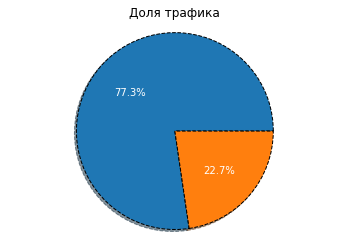

In [ ]:
#строим кругговую диаграмму
import matplotlib.pyplot as plt
vals = [3184, 934]
labels = ['People', 'Robot']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True, textprops=dict(color="w"))
ax.set_title("Доля трафика")
ax.axis("equal")

<font size = 5>Вывод: <font size = 3>Мы видим, что за выбранный период обнаружено 934 бота, что составляет 22.68% от всего трафика.

In [ ]:
#оставляем только роботов
only_robots_df = metrika_df[metrika_df['ym:s:isRobot'] == 'Robots']
#группируем датафрейм по полям источника и часов
only_robots_df = only_robots_df.groupby(['ym:s:lastsignTrafficSource', 'ym:s:hour']).sum()
#оставляем нужные поля
only_robots_df = only_robots_df[['ym:s:visits']]
only_robots_df = only_robots_df.sort_values(by='ym:s:visits', ascending=False)
display(only_robots_df.head(20))

ym:s:visits
ym:s:lastsignTrafficSource ym:s:hour             
Search engine traffic      13:00             64.0
                           15:00             63.0
                           16:00             62.0
                           11:00             59.0
                           14:00             58.0
                           12:00             56.0
                           17:00             55.0
                           19:00             38.0
                           09:00             36.0
                           10:00             36.0
                           18:00             31.0
                           22:00             30.0
                           08:00             29.0
                           21:00             29.0
                           20:00             26.0
                           23:00             21.0
                           00:00             17.0
Direct traffic             12:00             15.0
                           14:00             14.0
                           13:00             13.0

<font size = 5>Вывод: <font size = 3>Мы видим, что больше всего ботов приходит по источнику "Search engine" ближе к обеденному времени.